<a href="https://colab.research.google.com/github/nadyaester/rockpaperscissors/blob/master/Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-29 17:49:20--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.57MB/s    in 46s     

2020-07-29 17:50:07 (6.75 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir(base_dir)

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.4,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
      base_dir,
      subset='training',
      target_size=(150,150), 
      batch_size=4, 
      class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(
      base_dir,
      subset='validation',
      target_size=(150,150),
      batch_size=4, 
      class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='elu'),
      tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])
model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2)

Epoch 1/20
30/30 - 7s - loss: 1.1444 - accuracy: 0.4500 - val_loss: 1.1494 - val_accuracy: 0.3000
Epoch 2/20
30/30 - 6s - loss: 1.1264 - accuracy: 0.4333 - val_loss: 0.9641 - val_accuracy: 0.5000
Epoch 3/20
30/30 - 6s - loss: 1.0007 - accuracy: 0.5417 - val_loss: 0.7907 - val_accuracy: 0.7000
Epoch 4/20
30/30 - 6s - loss: 0.8443 - accuracy: 0.6250 - val_loss: 0.6799 - val_accuracy: 0.5500
Epoch 5/20
30/30 - 6s - loss: 0.5750 - accuracy: 0.7583 - val_loss: 0.6232 - val_accuracy: 0.7500
Epoch 6/20
30/30 - 7s - loss: 0.4544 - accuracy: 0.8583 - val_loss: 0.7260 - val_accuracy: 0.6000
Epoch 7/20
30/30 - 6s - loss: 0.3599 - accuracy: 0.8333 - val_loss: 0.4616 - val_accuracy: 0.8000
Epoch 8/20
30/30 - 6s - loss: 0.2806 - accuracy: 0.9000 - val_loss: 0.0848 - val_accuracy: 0.9500
Epoch 9/20
30/30 - 6s - loss: 0.2683 - accuracy: 0.9167 - val_loss: 0.2555 - val_accuracy: 0.8500
Epoch 10/20
30/30 - 6s - loss: 0.3041 - accuracy: 0.8833 - val_loss: 0.4213 - val_accuracy: 0.9000
Epoch 11/20
30/30 -

Saving 1yeoLbmp4alVOtFv.png to 1yeoLbmp4alVOtFv.png
1yeoLbmp4alVOtFv.png
paper


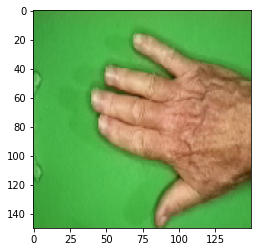

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')